BEGINNING OF PROGRAM

ASSESSING
ASSESSING COMPLETE


Perform cleanup, return dataframe with converted dtypes, no null values.
Suggest dropping these columns: 
 ['mths_since_last_delinq', 'mths_since_last_record', 'next_payment_date', 'mths_since_last_major_derog']
Dropped columns: 
 ['mths_since_last_delinq', 'mths_since_last_record', 'next_payment_date', 'mths_since_last_major_derog']
CLEANUP COMPLETE


Modify current_all_columns to reflect the removal of the previously stated columns from the dataframe
MODIFICATIONS COMPLETE
These are the symbols that will be dropped:  [['id', 'member_id', 'term', 'int_rate', 'grade', 'sub_grade', 'employment_length', 'verification_status', 'issue_date', 'payment_plan', 'purpose', 'dti', 'delinq_2yrs', 'home_ownership', 'earliest_credit_line', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'last_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'annual_inc']]
These are the remaining symbols

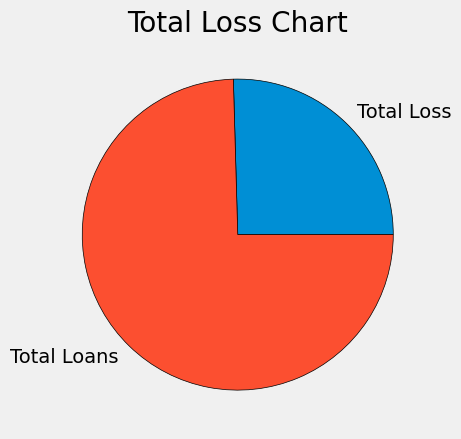


MILESTONE 4 TASK 3 ENDS HERE



In [25]:
from RDSDatabaseConnector import RDSDatabaseConnector
from Plotter import Plotter
from DataTransform import DataTransform
from DataFrameTransform import DataFrameTransform
from DataFrameInfo import DataFrameInfo
from functions import display_suggested_drops, column_drop, create_new_column
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns

RDSD = RDSDatabaseConnector()
PL = Plotter()
DT = DataTransform()
DFT = DataFrameTransform()
DFI = DataFrameInfo()

print("BEGINNING OF PROGRAM\n")
print("ASSESSING")
datacsv_df = pd.read_csv('data.csv') #define dataframe
current_all_columns = list(datacsv_df.columns) #define list of all columns in dataframe

#columns to convert to the various formats:
list_of_to_categorical = ['term','grade','sub_grade', 'employment_length','home_ownership','verification_status','loan_status','payment_plan','purpose','delinq_2yrs','application_type']
list_of_to_boolean = ['policy_code']
list_of_to_float = []
list_of_to_int = []
date_columns = ['issue_date','earliest_credit_line','last_payment_date','next_payment_date','last_credit_pull_date']
acceptable_null_percentage: float = 80.0
print("ASSESSING COMPLETE")

def initial_general_cleanup(dataframe: pd.core.frame.DataFrame, acceptable_null_percentage):
    """Perform cleanup, return dataframe with converted dtypes, no null values.
    Specific cleanup processes to
    be listed here in detail:
    
    Perform Conversions - dates, categorical, boolean, float, int.
    Drop Null columns under X% full of rows.
    Impute columns with data.
    
    args:
    dataframe (type: pd.core.frame.DataFrame)
    acceptable_null_percentage (type: float)
    
    """
    #Column Conversions:
    dataframe = DT.convert_dates_to_proper_format(dataframe, date_columns, format = '%b-%Y') # %b is Jan/Feb/Mar etc
    dataframe = DT.to_categorical(dataframe, list_of_to_categorical)
    dataframe = DT.to_boolean(dataframe, list_of_to_boolean)
    dataframe = DT.to_float(dataframe, list_of_to_float)
    dataframe = DT.to_int(dataframe, list_of_to_int)
    
    #Drop Null columns under X%:
    acceptable_null_percentage = display_suggested_drops(dataframe, acceptable_null_percentage)
    dataframe, dropped_columns= column_drop(dataframe, acceptable_null_percentage)
    
    #Impute the rest of the columns:
    dataframe = DFT.impute(dataframe)
    
    return dataframe, dropped_columns

#Perform cleanup, return dataframe with converted dtypes, no null values.
print("\n")
print("Perform cleanup, return dataframe with converted dtypes, no null values.")
clean_dataframe, dropped_columns = initial_general_cleanup(datacsv_df, acceptable_null_percentage)
print("CLEANUP COMPLETE")

#remove dropped columns from current_all_columns variable.
print("\n")
print("Modify current_all_columns to reflect the removal of the previously stated columns from the dataframe")
for i in dropped_columns:
    current_all_columns.remove(i)
print("MODIFICATIONS COMPLETE")
### UP TO HERE YIELDS A DATAFRAME CALLED clean_dataframe.

###OPTIONAL CODE FOR SKEW CORRECTION BEGIN
'''#THE PART WHERE SKEW MAY BE IMPORTANT
#Check for skew in the dataframe
#Visualise skew in the dataframe
#Apply skew correction for each column if (on a per column basis) it is necessary
#PL.skew_correction(clean_dataframe)

#dataframe = apply_skew_correction(dataframe)
'''
###OPTIONAL CODE FOR SKEW CORRECTION END

def remove_columns_for_analysis(dataframe, columns):
    def remove_columns(dataframe, columns):
        clean_dataframe, symbols_removed = DT.excess_symbol_removal(dataframe, columns)
        return clean_dataframe, symbols_removed

    symbols_to_be_removed_from_dataframe = [columns]
    dataframe, symbols_removed = remove_columns(dataframe, symbols_to_be_removed_from_dataframe)
    for i in symbols_removed:
        dropped_columns.append(i)#append symbols to be removed to dropped_columns
    return dataframe

# Remove excess symbols
symbols = ['id', 'member_id', 'term', 'int_rate', 'grade', 'sub_grade', 'employment_length',
           'verification_status', 'issue_date', 'payment_plan', 'purpose', 'dti', 'delinq_2yrs', 'home_ownership',
           'earliest_credit_line', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'last_payment_date',
           'last_credit_pull_date', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'annual_inc']

dataframe_for_MS4_T2_analysis = remove_columns_for_analysis(clean_dataframe, symbols)
print("SYMBOLS REMOVED")
### UP TO HERE YIELDS A DATAFRAME CALLED dataframe_for_MS4_T3_analysis.
print("\n")


def milestone_4_task_2(dataframe: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    """Milestone 4 Task 2

    The company wants to check what percentage of loans have been a loss to the company:

    Loans marked as Charged Off in the loan_status column represent a loss to the company.


    Calculate the percentage of charged off loans historically and the total amount that 
    was paid towards these loans before being charged off.
    """
    def calculate_the_percentage_of_charged_off_loans_historically(dataframe: pd.core.frame.DataFrame)-> None:
        no_of_charged_off = []
        for i in dataframe['loan_status']:
            if i == 'Charged Off':
                no_of_charged_off.append(i)
        print("Number of individual loans charged off:\n", len(no_of_charged_off))
        print("Charged off loans as a percentage of all loans:\n", (len(no_of_charged_off)/len(dataframe_for_MS4_T2_analysis))*100, "%")
        return None

    calculate_the_percentage_of_charged_off_loans_historically(dataframe_for_MS4_T2_analysis)

    #the total amount that was paid towards these loans before being charged off.
    #- **total_payment**: Payments received to date for total amount funded
    #- **total_rec_int**: Interest received to date
    #- **total_rec_late_fee**: Late fees received to date

    dataframe_for_MS4_T2_analysis_with_new_column = create_new_column(dataframe_for_MS4_T2_analysis, new_column = 'tot_amount_paid_before_chgd_off')

    def remove_non_charged_off_rows():
        charged_off_df = dataframe_for_MS4_T2_analysis_with_new_column[(dataframe_for_MS4_T2_analysis_with_new_column == 'Charged Off').any(axis=1)]
        return charged_off_df

    charged_off_df = remove_non_charged_off_rows().copy()

    def add_total_amount_paid_before_chgd_off():
        for i in charged_off_df['tot_amount_paid_before_chgd_off']:
            i = (charged_off_df['total_payment'] + charged_off_df['total_rec_int'])
            charged_off_df['tot_amount_paid_before_chgd_off'] = i
            return charged_off_df
    charged_off_df = add_total_amount_paid_before_chgd_off()
    return dataframe, charged_off_df
dataframe_for_MS4_T3_analysis, charged_off_df = milestone_4_task_2(dataframe_for_MS4_T2_analysis)

print("Total Amount Paid Off Before Being Charged Off:\n", charged_off_df['tot_amount_paid_before_chgd_off'].sum())

def milestone_4_task_3_step_1():
    "Calculate the loss in revenue these loans would have generated for the company if they had finished their term."
    def some_function_to_calculate_the_loss_in_revenue_these_loans_would_have_generated():
        charged_off_total = charged_off_df['tot_amount_paid_before_chgd_off'].sum()
        column_which_has_the_total_amount_that_was_loaned = charged_off_df['loan_amount']
        total_loans = column_which_has_the_total_amount_that_was_loaned.sum()
        total_loss = total_loans - charged_off_total
        return total_loss, total_loans
    total_loss, total_loans = some_function_to_calculate_the_loss_in_revenue_these_loans_would_have_generated()
    print(f"The loss of revenue due to the loans marked as 'Charged Off':\n {total_loss}")
    return charged_off_df, total_loss, total_loans
charged_off_df, total_loss, total_loans = milestone_4_task_3_step_1()
'''Calculate the projected loss of the loans marked as Charged Off.
Calculate the loss in revenue these loans would have generated for the company if they had finished their term. 
Visualise the loss projected over the remaining term of these loans.
'''
def milestone_4_task_3_step_2():
    plt.style.use("fivethirtyeight")
    slices = [total_loss, total_loans] # place the loss projected in one, and the total revenue in the other...
    labels = ["Total Loss", "Total Loans"]
    plt.pie(slices, labels=labels, wedgeprops={'edgecolor': 'black'})
    plt.title("Total Loss Chart")
    plt.tight_layout
    plt.show()
    return None
milestone_4_task_3_step_2()
print("\nMILESTONE 4 TASK 3 ENDS HERE\n")


In [26]:
'''#MILESTONE 4 TASK 4
There are customers who are currently behind with their loan payments.
This subset of customers represent a risk to company revenue.


What percentage do users' in this bracket currently represent as a percentage of all loans?
Calculate the total amount of customers in this bracket and how much loss the company would
incur if their status was changed to Charged Off.

What is the projected loss of these loans if the customer were to finish the full loans term?


If customers late on payments converted to Charged Off, what percentage of total expected revenue
do these customers and the customers who have already defaulted on their loan represent?
'''
dataframe_for_MS4_T4_analysis = clean_dataframe.copy() #this is as old a dataframe as is allowable.
'''Step1
There are customers who are currently behind with their loan payments.
This subset of customers represent a risk to company revenue.

What percentage do users' in this bracket currently represent as a percentage of all loans?
'''
###
def milestone_4_task_4_step_1():
    def List_Of_Categories_In_Column(): return list(dataframe_for_MS4_T4_analysis['loan_status'].value_counts().index)
    list_of_categories_in_loan_status_column = List_Of_Categories_In_Column()
    print(list_of_categories_in_loan_status_column)
    #list_of_categories_in_loan_status_column = ['Fully Paid', 'Current', 'Charged Off',
    #                                            'Does not meet the credit policy. Status:Fully Paid',
    #                                            'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off',
    #                                            'In Grace Period', 'Late (16-30 days)', 'Default']
    #only the two categories where it says Late can count as customers who are currently behind with their loan payments.

    late_df = dataframe_for_MS4_T4_analysis.copy()
    a = late_df.loc[late_df['loan_status'] == 'Late (31-120 days)']#, ['loan_status'] == 'Late (16-30 days)']
    b = late_df.loc[late_df['loan_status'] == 'Late (16-30 days)']

    no_of_late_loans = len(a)+len(b)
    no_of_loans = len(dataframe_for_MS4_T4_analysis['loan_status'])
    percentage = (no_of_late_loans/no_of_loans)*100
    # What percentage do users' in this bracket currently represent as a percentage of all loans?
    print(f"Percentage of Late Loans: {percentage.__round__(2)} %")
    return no_of_late_loans, a, b
no_of_late_loans, a, b = milestone_4_task_4_step_1()
###

'''Step2
Calculate the total amount of customers in this bracket and how much loss the company would
incur if their status was changed to Charged Off.
'''

###
def milestone_4_task_4_step_2():
    # Calculate the total amount of customers in this bracket:
    print("No of customers with late loans: ", no_of_late_loans)
    #and how much loss the company would incur if their status was changed to Charged Off
    print("loss the company would incur if late became charged off: ", a['loan_amount'].sum() + b['loan_amount'].sum() - a['total_payment'].sum() - b['total_payment'].sum())
milestone_4_task_4_step_2()
###

'''Step3
What is the projected loss of these loans if the customer were to finish the full loans term?
'''

###
def milestone_4_task_4_step_3():
    # full_loans_term = principle + interest
    a_with_column_promised_interest = a.copy()
    b_with_column_promised_interest = b.copy()
    def create_new_column(dataframe: pd.core.frame.DataFrame, new_column: str)-> pd.core.frame.DataFrame:
        dataframe[f'{new_column}'] = np.nan
        return dataframe
    create_new_column(a_with_column_promised_interest, 'promised_interest')
    create_new_column(b_with_column_promised_interest, 'promised_interest')
    pattern = r'\d+'
    def impute_promised_interest(dataframe):
        for i in dataframe['promised_interest']:
            i = dataframe['term'].str.match(pattern) * dataframe['instalment']
            dataframe['promised_interest'] = i
        return dataframe
    
    a_with_column_promised_interest_imputed = impute_promised_interest(a_with_column_promised_interest)
    b_with_column_promised_interest_imputed = impute_promised_interest(b_with_column_promised_interest)

    principle_a = a_with_column_promised_interest_imputed['loan_amount'].sum()
    interest_a = a_with_column_promised_interest_imputed['promised_interest'].sum()
    full_loans_term_a = principle_a + interest_a
    
    principle_b = b_with_column_promised_interest_imputed['loan_amount'].sum()
    interest_b = b_with_column_promised_interest_imputed['promised_interest'].sum()
    full_loans_term_b = principle_b + interest_b
    print("Projected loss if customers finish the full loans term: ", (full_loans_term_a + full_loans_term_b))
    return None
milestone_4_task_4_step_3()
###

'''Step4
If customers late on payments converted to Charged Off, what percentage of total expected revenue
do these customers and the customers who have already defaulted on their loan represent?
'''

###
# charged_off_lot_rev_loss = The loss of revenue due to the loans marked as 'Charged Off': 25854509.96918051
# late_lot_rev_loss = loss the company would incur if late became charged off:  3408775.0499999993
# total_lot_rev = 
# total expected revenue = dataframe_which_still_has_all_loanstatuses['promised_interest'+'loan_amount'].sum
dataframe_which_still_has_all_loanstatuses = dataframe_for_MS4_T4_analysis.copy()

dataframe_with_promised_interest = create_new_column(dataframe_which_still_has_all_loanstatuses, 'promised_interest')
dataframe_with_promised_interest_and_total_expected_revenue = create_new_column(dataframe_with_promised_interest, 'total_expected_revenue')

def impute_promised_interest(dataframe):
    pattern = r'\d+'
    for i in dataframe['promised_interest']:
        i = dataframe['term'].str.match(pattern) * dataframe['instalment']
        dataframe['promised_interest'] = i
    return dataframe
def imput_total_expected_revenue(dataframe):
    for i in dataframe['total_expected_revenue']:
        i = dataframe['promised_interest'] + dataframe['loan_amount']
        dataframe['total_expected_revenue'] = i
    return dataframe
dataframe_with_promised_interest_and_total_expected_revenue_imputed = impute_promised_interest(dataframe_with_promised_interest_and_total_expected_revenue)
dataframe_with_promised_interest_and_total_expected_revenue_imputed_imputed = imput_total_expected_revenue(dataframe_with_promised_interest_and_total_expected_revenue_imputed)


dataframe_with_promised_interest_and_total_expected_revenue_imputed_imputed['total_expected_revenue']

charged_off_lot_rev_loss = total_loss
late_lot_rev_loss = (a['loan_amount'].sum() + b['loan_amount'].sum() - a['total_payment'].sum() - b['total_payment'].sum())
total_expected_revenue = dataframe_with_promised_interest_and_total_expected_revenue_imputed_imputed['total_expected_revenue'].sum()
print(f"Customers late on payments and customers who have been charged off represent {((charged_off_lot_rev_loss+late_lot_rev_loss)/total_expected_revenue)*100} % of total expected revenue")
###
print("END OF TASK 4")

['Fully Paid', 'Current', 'Charged Off', 'Does not meet the credit policy. Status:Fully Paid', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off', 'In Grace Period', 'Late (16-30 days)', 'Default']
Percentage of Late Loans: 1.27 %
No of customers with late loans:  686
loss the company would incur if late became charged off:  3408775.0499999993
Projected loss if customers finish the full loans term:  10611977.66
Customers late on payments and customers who have been charged off represent 3.932828731527665 % of total expected revenue
END OF TASK 4


TASK 5:

In this task you will be analysing the data to visualise the possible indicators that a customer will not be able to pay the loan.


You will want to compare columns which might be indicators against customers who have already stopped paying and customers who are currently behind on payments.


Here are some example columns that might indicate that a user might not pay the loan:

- Does the grade of the loan have effect on customers not paying?
- Is the purpose for the loan likely to have an effect?
- Does the home_ownership value contribute to the likelihood a customer won't pay?

To help identify which columns will be of interest, create a subset of these users.


Make the analysis and determine the columns are contributing to loans not being paid off and visualise any interesting indicators.

Compare these indicators between loans already charged off and loans which could change to charged off to check if these same factors apply to loans which have the potential to change to "Charged Off".

length of group charged off: 5866
length of group late: 580
length of group everyone else: 46622
Available Grades:  ['A', 'B', 'C', 'D', 'E', 'F', 'G']
List of no of grades in grades:  [425, 1321, 1540, 1253, 780, 398, 149]
Percentages of charged off groups [7.245141493351517, 22.519604500511424, 26.25298329355609, 21.360381861575178, 13.296965564268667, 6.784861916126833, 2.540061370610297]


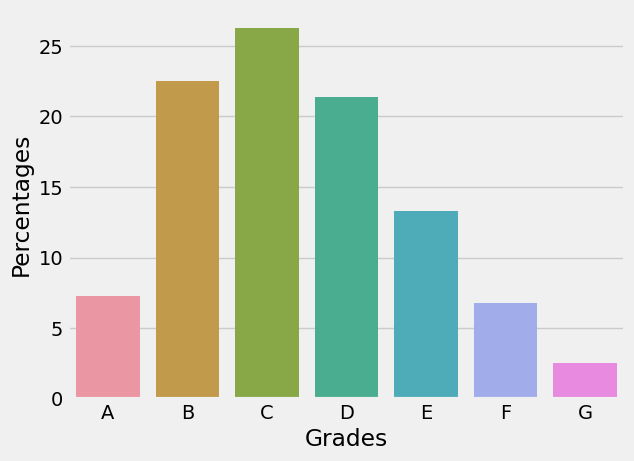

END OF CODE


In [317]:
#columns: 'grade' 'purpose' 'home_ownership'
#rint(clean_dataframe['grade'],clean_dataframe['purpose'],clean_dataframe['home_ownership'])
def creating_the_groups():
    list_of_loan_status_categories = list(clean_dataframe['loan_status'].unique())
    #print(type(list_of_loan_status_categories))

    tuple_group_charged_off = (list_of_loan_status_categories[2], list_of_loan_status_categories[8], list_of_loan_status_categories[6])
    tuple_group_late = (list_of_loan_status_categories[3], list_of_loan_status_categories[5])
    tuple_group_everyone_else = (list_of_loan_status_categories[0], list_of_loan_status_categories[1], list_of_loan_status_categories[4], list_of_loan_status_categories[6], list_of_loan_status_categories[7])

    #THE IMPORTANT LISTS
    list_group_charged_off = list(tuple_group_charged_off[0:2])
    list_group_late = list(tuple_group_late[0:1])
    list_group_everyone_else = list(tuple_group_everyone_else[0:4])

    #print("list for the group charged off:",(list_group_charged_off))
    #print("list for the group late:",(list_group_late))
    #print("list for the group everyone else:",(list_group_everyone_else))

    dataframe_for_MS4_T5_analysis = clean_dataframe.copy()

    df_group_charged_off = dataframe_for_MS4_T5_analysis #df rows = charged off in column loanstatus
    df_group_charged_off = df_group_charged_off.loc[df_group_charged_off['loan_status'].isin(list_group_charged_off)]
    #print(df_group_charged_off['loan_status'])

    df_group_late = dataframe_for_MS4_T5_analysis #df rows = late () + late () in column loanstatus
    df_group_late = df_group_late.loc[df_group_late['loan_status'].isin(list_group_late)]
    #print(df_group_late['loan_status'])

    df_group_everyone_else = dataframe_for_MS4_T5_analysis #df rows = other
    df_group_everyone_else = df_group_everyone_else.loc[df_group_everyone_else['loan_status'].isin(list_group_everyone_else)]
    #print(df_group_everyone_else['loan_status'])
    return df_group_charged_off, df_group_late, df_group_everyone_else
df_group_charged_off, df_group_late, df_group_everyone_else = creating_the_groups()
#another approach to visualisation(not yet defined but more complicated)
# 9 QUESTIONS
'''Step 1
#GRADE - charged off, are these correlated? Check by isolating the charged off dataframe,
#        then displaying a percentage of each category of grade
#GRADE - almost charged off, are these correlated? Check by isolating the almost charged off dataframe,
#        then displaying a percentage of each category of grade
#GRADE - everyone else, are these correlated? Check by isolating the everyone else dataframe,
#        then displaying a percentage of each category of grade
# A type of chart that might be good in this case may be barplot,
# to display each grade category and a percent for each one
'''
###
def milestone_4_task_5_step_1():
    #shows length of groups
    print("length of group charged off:" ,len(df_group_charged_off))
    print("length of group late:" ,len(df_group_late))
    print("length of group everyone else:" ,len(df_group_everyone_else))
    df_group_charged_off >>> GROUPNAME
    
    def get_list_of_available_grades():
        """Get a list of the available grades in the column 'grade' within the dataframe df_group_charged_off
        Cannot really generalise this function very much,
        so it will stay as it is for the moment.
        """
        available_grades = []
        for i in df_group_charged_off['grade'].unique(): available_grades.append(i)
        alphabetically_ordered_list_of_available_grades = sorted(available_grades)
        return alphabetically_ordered_list_of_available_grades
    alphabetically_ordered_list_of_available_grades = get_list_of_available_grades()
    print("Available Grades: ", alphabetically_ordered_list_of_available_grades)        
    
    def get_no_of_grade_X_in_grades_column(specific_grade: str) -> int:
        list_of_grade_X = []
        for i in df_group_charged_off['grade']: # for element in column 'grade' in group: df_group_charged_off
            if i == specific_grade:
                list_of_grade_X.append(i)
        return len(list_of_grade_X)
    
    def get_list_of_no_of_grades_in_grade():
        no_of_grade_A_in_grades_column = get_no_of_grade_X_in_grades_column('A')
        no_of_grade_B_in_grades_column = get_no_of_grade_X_in_grades_column('B')
        no_of_grade_C_in_grades_column = get_no_of_grade_X_in_grades_column('C')
        no_of_grade_D_in_grades_column = get_no_of_grade_X_in_grades_column('D')
        no_of_grade_E_in_grades_column = get_no_of_grade_X_in_grades_column('E')
        no_of_grade_F_in_grades_column = get_no_of_grade_X_in_grades_column('F')
        no_of_grade_G_in_grades_column = get_no_of_grade_X_in_grades_column('G')

        list_of_no_of_grades_in_grade = [no_of_grade_A_in_grades_column,
                  no_of_grade_B_in_grades_column, 
                  no_of_grade_C_in_grades_column, 
                  no_of_grade_D_in_grades_column, 
                  no_of_grade_E_in_grades_column, 
                  no_of_grade_F_in_grades_column, 
                  no_of_grade_G_in_grades_column]
        return list_of_no_of_grades_in_grade
    
    #Barplot for Charged Off Group:
    list_of_no_of_grades_in_grade = get_list_of_no_of_grades_in_grade()
    print("List of no of grades in grades: ", list_of_no_of_grades_in_grade)
    list_of_no_of_grades_in_grade_as_a_percentage_of_charged_off_group = [((x/len(df_group_charged_off))*100) for x in list_of_no_of_grades_in_grade]
    print("Charged Off Group Grade Percentages", list_of_no_of_grades_in_grade_as_a_percentage_of_charged_off_group)
    
    grades_and_their_percentages_dictionary = {'Grades': alphabetically_ordered_list_of_available_grades,
                     'Percentages': list_of_no_of_grades_in_grade_as_a_percentage_of_charged_off_group}
    my_dataframe = pd.DataFrame(grades_and_their_percentages_dictionary, index = [0,1,2,3,4,5,6])
    sns.barplot(x = 'Grades', y ='Percentages', data=my_dataframe)
    
    #Barplot for Charged Off Group:
    
    #Barplot for Charged Off Group:
    
    plt.show()
    return None
milestone_4_task_5_step_1()
###
'''Step 2
#PURPOSE - charged off, are these correlated?
#PURPOSE - almost charged off, are these correlated?
#PURPOSE - everyone else, are these correlated?
'''
###
def milestone_4_task_5_step_2():
    #we are going to need 
    pass
milestone_4_task_5_step_2()
###
'''Step 3
#HOME_OWNERSHIP - charged off, are these correlated?
#HOME_OWNERSHIP - almost charged off, are these correlated?
#HOME_OWNERSHIP - everyone else, are these correlated?
'''
###
def milestone_4_task_5_step_3():
    pass
milestone_4_task_5_step_3()
###

print("END OF CODE")